<h1><img align="right" width="350" src="img/ATU-Logo-Full-RGB-Green.jpg"> Fundamentals of Data Analysis - Project
</h1>
<p> 
Course: HDip in Computing in Data Analytics <br>
Module: Fundamentals of Data Analysis <br>
Lecturer: Ian McLoughlin

A notebook which contains the work on the Project for the above module (Autumn 2023). Project requirements and scope in assessment/2324_winter_fund_assessment_instructions.pdf

Student: Eilis Donohue (G00006088)

Software Used: 
 - Python v3.10 and higher
 - Jupyter Notebook 6.5.2  

***

## Table of Contents

- Introduction
- Data and Variable Classification
- Summary Statistics
- Data Distribution
-

## Introduction
Fisher's Iris Dataset [1] is a well known dataset dating from the 1930s when analysis of it was published in the Annual Eugenics journal [9] by the academic R.A. Fischer. 

R.A. Fisher was an English polymath who was active in the fields of mathematics, statistics, biology and genetics and made many important contributions to the field of statistical analysis [10]. The iris dataset comprises 50 measurements each of three distinct classes of iris flower found growing in the same meadow. The length and width of the sepal and petal for each flower along with the class or iris type is recorded in the dataset [2]. The flower types are shown in the image below with sepals and petals indicated [3].

Fisher's paper [9] describes a statistical method for determining classification based on measurement data. The original paper described a statistical method of linear discriminant analysis (LDA) [11]. The dataset is still widely referenced today and is used as a training set for discriminant analysis in machine learning applications.

The aim of this analysis is to analyse the dataset using Python according to the criterion in the project specification [13], giving insight into the variable types in the dataset, the summary statistics and characteristics of the data and data trends. The dataset is made available through the UCI archive [12]. 

<figure>
<img src="img/iris-dataset.png"  width="500px">
<figcaption style = 'text-align: center' > Iris types showing sepal and petal taken from [3] </figcaption>
</figure>


In [56]:
# Import required python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# ************************ Function definitions ***************************
# Run pandas correlation method (Pearson)
def get_corr(data):
    return data.corr()

# Styler for Jupyter notebook table display [12]
def my_styler(df, precision, caption):
    df_styler = df.style.format(precision=precision).set_caption(caption)
    return df_styler

# Styler to highlight values in a table [12]
def styler_highlight_between(df_styler, left, right):
    df_styler = df_styler.highlight_between(color='yellow', axis=0, left=left, right=right, inclusive='both', props=None) 
    return df_styler

# Function to calculate the basic statistics of a dataset
def get_summary_stats(data, item=''):
    # Get the basic stats of data with optional argument "item" to differentiate 
    # pd.describe() does similar but wanted to show variance also
    summary_df = pd.DataFrame()
    summary_df['Min (cm)'] = data.min()
    summary_df['Max (cm)'] = data.max()
    summary_df['Mean (cm)'] = data.mean()
    summary_df['25% quartile'] = data.quantile(0.25)      
    summary_df['Median (cm)'] = data.median()
    summary_df['75% quartile'] = data.quantile(0.75)    
    summary_df['StDev (cm)'] = data.std()
    summary_df['Variance (cm)'] = data.var()  
    return summary_df

In [51]:
# Data ingest
# Read in the data from the source file - no header  
data = pd.read_csv('data/iris/iris.data', header=None)

# Make a list of the columns (see data/iris/iris.names) and assign to the dataframe (see iris.names)
variables = ["Sepal Length", "Sepal Width", "Petal Length",
             "Petal Width", "Class"]
data.columns = variables
print(f'First 5 lines:\n{data.head(5)}\n')  
print(data.head())

First 5 lines:
   Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

   Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [53]:
# Some basic information on the dataset
print(f'Dataframe shape is (rows, columns): {data.shape}')   
# Check for any missing values in the dataframe and sum up on rows and columns 
print(f'{data.isna().sum().sum()} missing values in dataframe')
# Get the unique classifications 
class_names = data["Class"].unique()
print(f'Class names: {class_names}\n')
for iris in class_names:
  class_count = data['Class'].loc[data['Class']==iris].count()
  print(f'{iris} : {class_count}')
print('\nData Basic Info')
print(f'{data.info()}')


Dataframe shape is (rows, columns): (150, 5)
0 missing values in dataframe
Class names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Iris-setosa : 50
Iris-versicolor : 50
Iris-virginica : 50

Data Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Data and Variable Classification

The dataset from [1] contains 150 measurements of 3 types of iris flower, each row being a sample, measured as part of a study on classification made by R.A. Fisher [2]. 

### Data types

From the initial data ingest and interrogation above, the 5 variables in the dataset comprise 4 measurements (sepal and petal width and length) and a class variable, corresponding to iris type.

  - The 'class' variable is a **categorical** variable which would be classed as **nominal** [14] - there are 3 unique values in this categorical variable in the Iris dataset, each of which is the name of an iris species.
  - The other 4 variables are the flower/specimen measurements and are **numerical**,  **quantitative** and **continuous**. These 4 variables could also be described as **ratio** variable [14]. 

### Scales of Measurement (Stevens [15])

- In terms of the scales of measurement (as described by Stevens [15]), the class variable which describes the iris type or species is measured on a **nominal scale**. 
- The other variables which are the measurements of each flower specimen would be measured by **ratio** scale, which is further described as **fundamental** by Stevens in that it relates to a basic physical measurement (length).

### Mathematical types
- The measurements of the iris attributes, are **real** positive numbers.


### Python variables

  - The class variable (categorical) is an object type in Python - the iris name is a Python **string** variable. 
  - The other 4 variables which are the physical measurements of each flower specimen are **floats**. As seen above, there are no missing data from any of the variables or rows. There are no nans in the 4 measurement variables.


## Summary Statistics
### Basic summary statistics
  - From the summary statistics returned below and the boxplot and scatter plot visual representations, it is seen that the measurements range between 0.1cm (petal width of the Iris-setosa) and 7.9cm (maximum sepal length of the Iris-virginica).
  - The summary statistics of the entire dataset and then broken down by the three iris types is shown below. Min, max and mean allow identification of the main measurement characteristics and bounds of the measurements. The statistics tables are a complement to the box plots so that exact statistical result values may be referenced.

### Plots - Box and Scatter

Scatter plots for petal and sepal measurements are given below with linear regression lines shown. 
  - The boxplot is a useful visual tool for commuicating the min, max, median and spread of each variable for each class or iris type. The relative size of each flower can be demonstrated if a common axis is used. In this case, the whiskers of the box plot represent the minimum and maximum measurements. The box extents represent the 25th and 75th centiles. The red line is the median value. 
  - The linear distinctness can again be seen between the Iris-setosa and the other 2 iris types, where the setosa scatter data lies distinct from the other two datasets. 
  - The scatter plots indicate qualitatively the degree of correlation between sepal and petal lengths and widths for the different iris types. 
  - From the scatter plots below, it can be inferred that the data was measured with a precision of 0.1cm.  


,Min (cm),Max (cm),Mean (cm),25% quartile,Median (cm),75% quartile,StDev (cm),Variance (cm)
Sepal Length,4.30,7.90,5.84,5.10,5.80,6.40,0.83,0.69
Sepal Width,2.00,4.40,3.05,2.80,3.00,3.30,0.43,0.19
Petal Length,1.00,6.90,3.76,1.60,4.35,5.10,1.76,3.11
Petal Width,0.10,2.50,1.20,0.30,1.30,1.80,0.76,0.58


,Min (cm),Max (cm),Mean (cm),25% quartile,Median (cm),75% quartile,StDev (cm),Variance (cm)
Sepal Length,4.30,5.80,5.01,4.80,5.00,5.20,0.35,0.12
Sepal Width,2.30,4.40,3.42,3.12,3.40,3.68,0.38,0.15
Petal Length,1.00,1.90,1.46,1.40,1.50,1.58,0.17,0.03
Petal Width,0.10,0.60,0.24,0.20,0.20,0.30,0.11,0.01


,Min (cm),Max (cm),Mean (cm),25% quartile,Median (cm),75% quartile,StDev (cm),Variance (cm)
Sepal Length,4.90,7.00,5.94,5.60,5.90,6.30,0.52,0.27
Sepal Width,2.00,3.40,2.77,2.52,2.80,3.00,0.31,0.10
Petal Length,3.00,5.10,4.26,4.00,4.35,4.60,0.47,0.22
Petal Width,1.00,1.80,1.33,1.20,1.30,1.50,0.20,0.04


,Min (cm),Max (cm),Mean (cm),25% quartile,Median (cm),75% quartile,StDev (cm),Variance (cm)
Sepal Length,4.90,7.90,6.59,6.22,6.50,6.90,0.64,0.40
Sepal Width,2.20,3.80,2.97,2.80,3.00,3.18,0.32,0.10
Petal Length,4.50,6.90,5.55,5.10,5.55,5.88,0.55,0.30
Petal Width,1.40,2.50,2.03,1.80,2.00,2.30,0.27,0.08


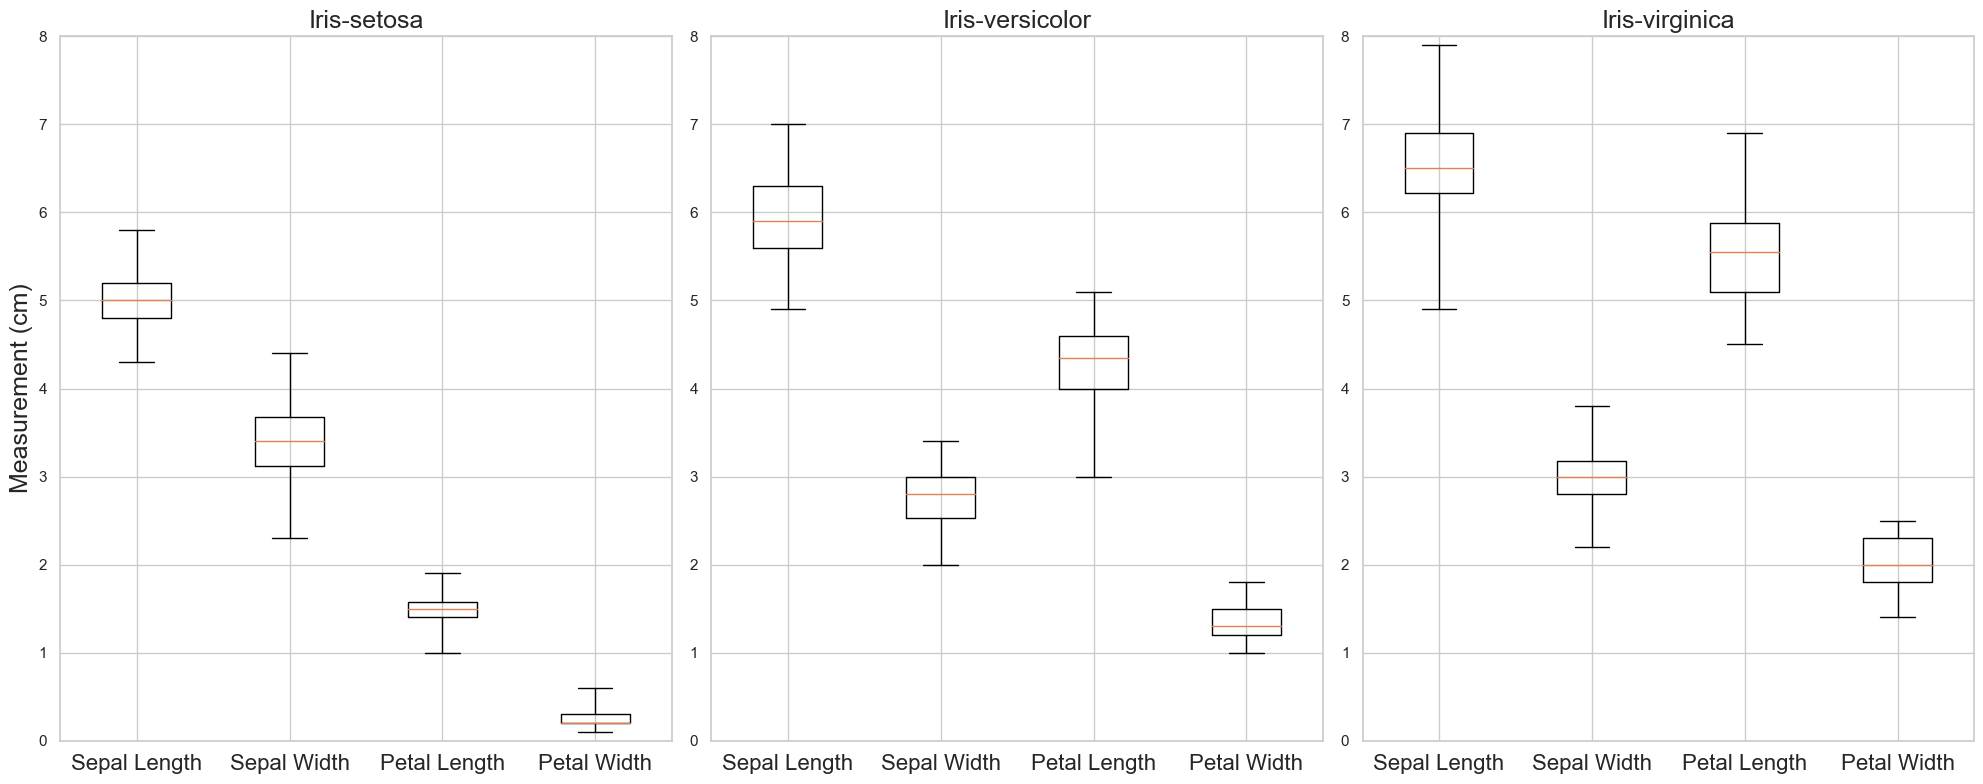

In [69]:
# Investigation of the numerical variables
# Return the statistics of the numerical variables in the dataset and plot them
#print(data.describe())

# ***************************** Get summary statistics ******************************
# Get the statistics for the whole dataset 
df_summary_all = get_summary_stats(data.drop(columns="Class"))
df_styler = my_styler(df_summary_all, 2, "Summary All")
summary_styler_list = [df_styler]

# Get the statistics for each of the 3 iris types
for item in class_names:
    # Extract the data related to one class of iris
    iris_data = data[data["Class"] == item].copy()
    # Strip the class column before passing to function
    iris_data.drop(columns = "Class", inplace=True) 
    # Get the stats and write to file
    df_summary = get_summary_stats(iris_data)
    df_styler_stats = my_styler(df_summary, 2, item+" Summary Statistics")
    summary_styler_list.append(df_styler_stats)
    df_corr =  get_corr(iris_data)      
    df_styler = my_styler(df_corr, 2, item + " Correlation")
    df_styler = styler_highlight_between(df_styler, 0.7, 0.99)
    df_styler = styler_highlight_between(df_styler, -0.99, -0.7)


# Display all the summary stats tables    
for item in summary_styler_list:
    display(item)

# Set up boxplot fig with 3 subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
# One y-axis label is enough
axs[0].set_ylabel('Measurement (cm)', fontsize=18)
for ax, iris in enumerate(class_names):
    data_iris = data[data["Class"] == iris].drop(columns = 'Class').copy()
    # Same y axis limit for all 3 variables for comparison 
    axs[ax].set_ylim(0, 8)
    # whis is arbitrarily high so that the whiskers represent min and max
    axs[ax].boxplot(data_iris, whis=10)
    axs[ax].set_xticklabels(variables[:-1], fontsize=16)
    axs[ax].set_title(iris, fontsize=18)
    axs[ax].grid(visible=True, which='both', axis='both')
fig.tight_layout() 

<Figure size 640x480 with 0 Axes>

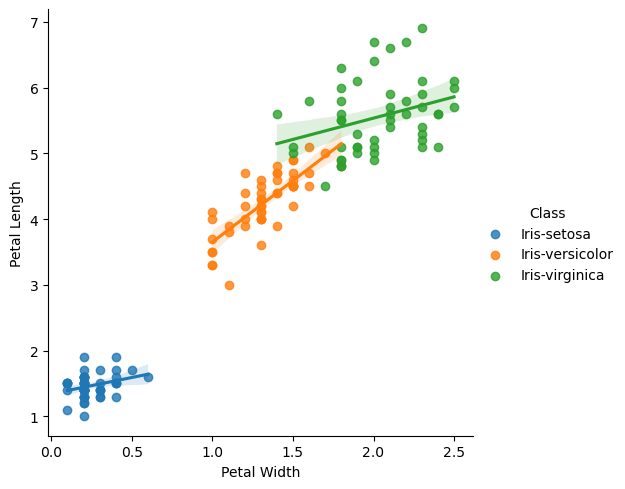

<Figure size 640x480 with 0 Axes>

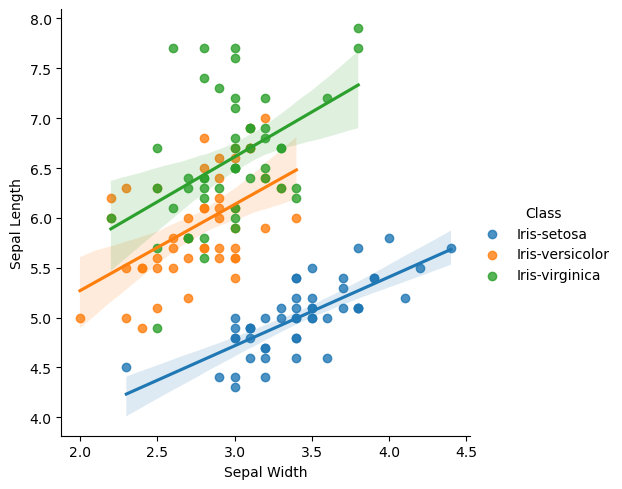

In [60]:
# Plot scatters for petal and sepal wtih seaborn - broken down by class [6]

plt.figure();
sns.lmplot(x ='Petal Width', y ='Petal Length', data = data, hue="Class");
plt.show();
plt.figure();
sns.lmplot(x ='Sepal Width', y ='Sepal Length', data = data, hue="Class");
plt.show();

## Data Distributions - Histograms

In order to investigate the underlying distributions of each measured variable, a histogram is plotted. A qualitative visualisation of the underlying distribution is easily obtained when the data is appropriately binned.

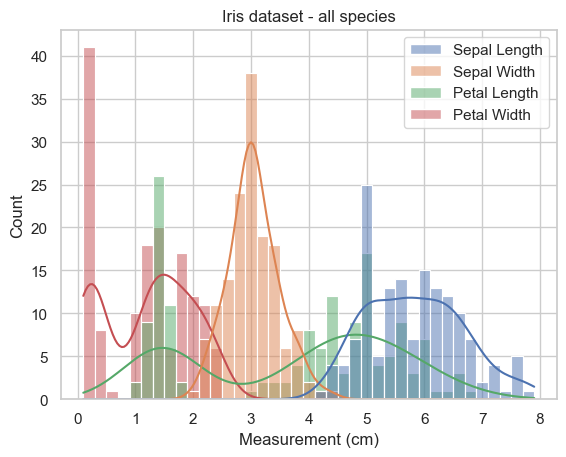

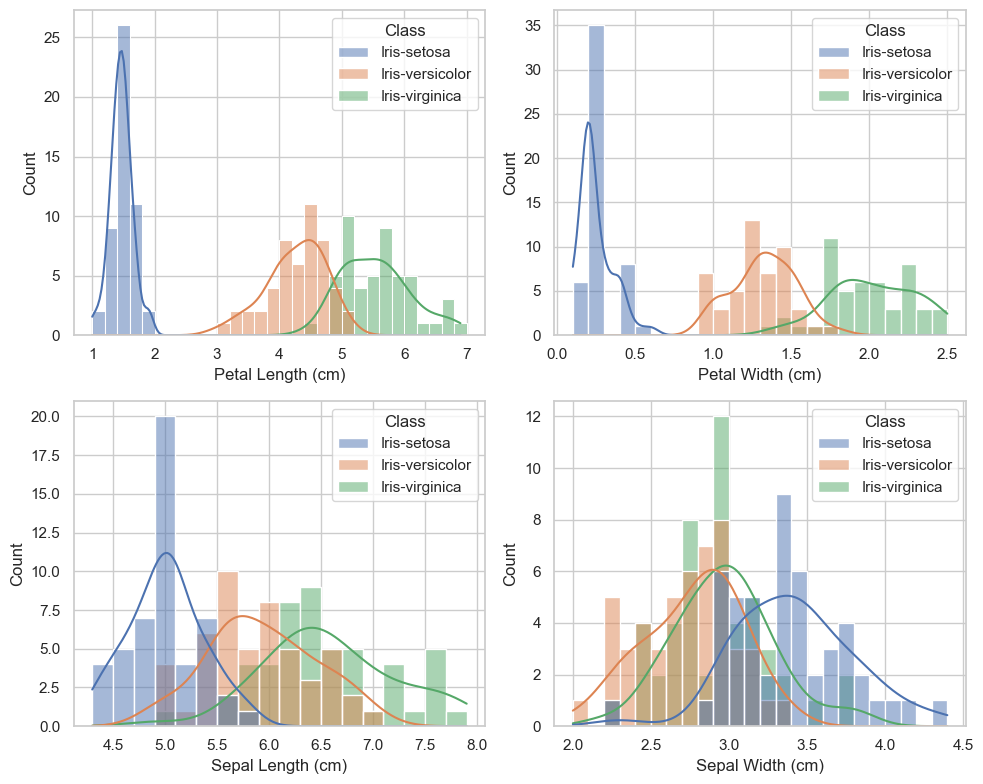

In [74]:
# Plot a histogram of the 4 variables for the entire dataset   
plt.figure()
g = sns.histplot(data.drop(columns="Class"), binwidth=0.2, kde=True)
g.set(title = "Iris dataset - all species")
g.set_xlabel('Measurement (cm)')

# Plot the histograms for each variable in the dataset in one figure
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(nrows = 2, ncols =2, figsize=(10,8))
sns.histplot(data, x="Petal Length", hue="Class", binwidth=0.2, kde=True, ax=ax[0,0])
sns.histplot(data, x="Petal Width", hue="Class", binwidth=0.1, kde=True, ax=ax[0,1])
sns.histplot(data, x="Sepal Length", hue="Class", binwidth=0.2, kde=True, ax=ax[1,0])
sns.histplot(data, x="Sepal Width", hue="Class", binwidth=0.1, kde=True, ax=ax[1,1])
# set the axis title
ax[0,0].set(xlabel="Petal Length (cm)")
ax[0,1].set(xlabel="Petal Width (cm)")
ax[1,0].set(xlabel="Sepal Length (cm)")
ax[1,1].set(xlabel="Sepal Width (cm)")
fig.tight_layout()
plt.show()

## Data Relationships and Correlation
To investigate any possible correlations in the data, a pair plot [4,5] is a useful qualitative tool for visualising data relationships. The distribution of each variable is also plotted on the diagonals.

The pair plot which also differentiates class or iris type clearly shows the linear distinctness between Iris-Setosa and the other iris types for all combinations of variables. 

A Pearson correlation table [7] shows the degree of correlation between the measurements for the whole dataset and for each iris type separately.  Correlation values higher than 0.75 are highlighted [8]. In the full dataset, high values of correlation are noted for Petal Length/Petal Width, Petal Length/Sepal Length and Petal Width/Sepal Length. 

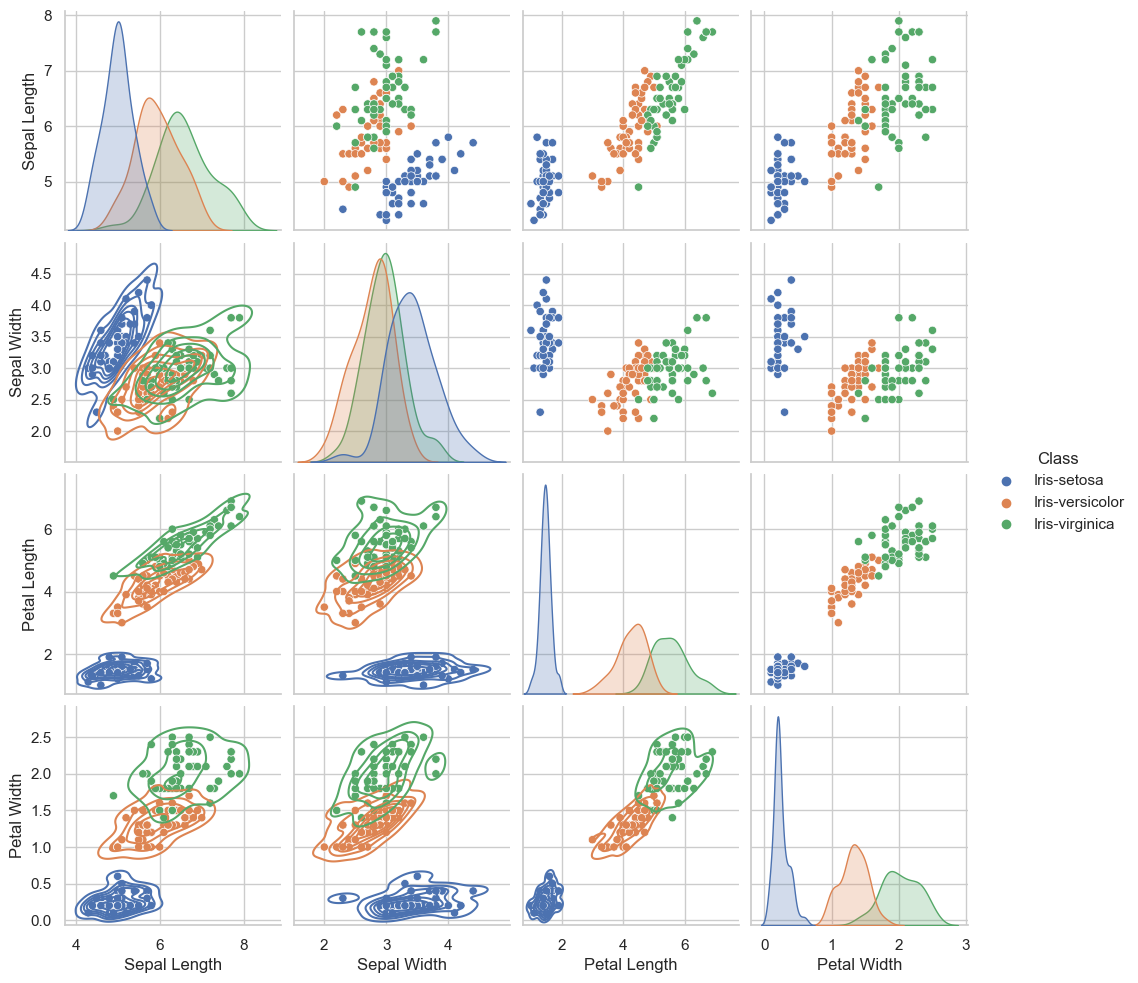

In [61]:
# Plot the Seaborn pairplot [4] Theme [5]
sns.set_theme(style='whitegrid')
g = sns.pairplot(data, hue="Class", diag_kind="kde")
g.map_lower(sns.kdeplot, levels=7, color=".2")
plt.show()

In [65]:
# Run the Pearson's correlation on the full dataset (dropping non-numeric fields)
df_corr_all = get_corr(data.drop(columns = "Class"))
df_styler = my_styler(df_corr_all, 2, "Correlation All Data")
# call the styler function to highlight high correlation values
df_styler = styler_highlight_between(df_styler, 0.7, 0.99)
df_styler = styler_highlight_between(df_styler, -0.99, -0.7)
corr_styler_list = [df_styler]
for item in class_names:
    # Extract the data related to one class of iris
    iris_data = data[data["Class"] == item].copy()
    # Strip the class column before passing to function
    iris_data.drop(columns = "Class", inplace=True) 
    df_corr =  get_corr(iris_data)      
    df_styler = my_styler(df_corr, 2, item + " Correlation")
    df_styler = styler_highlight_between(df_styler, 0.7, 0.99)
    df_styler = styler_highlight_between(df_styler, -0.99, -0.7)
    corr_styler_list.append(df_styler)

for item in corr_styler_list:
    display(item)

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,-0.11,0.87,0.82
Sepal Width,-0.11,1.00,-0.42,-0.36
Petal Length,0.87,-0.42,1.00,0.96
Petal Width,0.82,-0.36,0.96,1.00


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,0.75,0.26,0.28
Sepal Width,0.75,1.00,0.18,0.28
Petal Length,0.26,0.18,1.00,0.31
Petal Width,0.28,0.28,0.31,1.00


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,0.53,0.75,0.55
Sepal Width,0.53,1.00,0.56,0.66
Petal Length,0.75,0.56,1.00,0.79
Petal Width,0.55,0.66,0.79,1.00


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.00,0.46,0.86,0.28
Sepal Width,0.46,1.00,0.40,0.54
Petal Length,0.86,0.40,1.00,0.32
Petal Width,0.28,0.54,0.32,1.00


## References

1. Iris dataset source (/data/iris): https://archive.ics.uci.edu/dataset/53/iris
2. Iris data set wiki page: https://en.wikipedia.org/wiki/Iris_flower_data_set
3. Iris image: https://machinelearninghd.com/iris-dataset-uci-machine-learning-repository-project/
4. Seaborn Documentation, Pairplots https://seaborn.pydata.org/generated/seaborn.pairplot.html
5. Seaborn set theme: https://seaborn.pydata.org/generated/seaborn.set_theme.html
6. Seaborn scatterplots with regression https://seaborn.pydata.org/generated/seaborn.lmplot.html
7. Pearson's correlation in Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
8. Stylers for Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
9. Annals of Eugenics - September 1936 - The Use of Multiple Measurements in Taxonomic Problems
10. Ronald Fisher: https://en.wikipedia.org/wiki/Ronald_Fisher
11. Linear Discriminant Analysis: https://en.wikipedia.org/wiki/Linear_discriminant_analysis
12. UCI Archive - Fisher's Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris/
13. 2324_winter_fund_assessment_instructions.pdf: (/assessment/2324_winter_fund_assessment_instructions.pdf)
14. Variable types: https://statistics.laerd.com/statistical-guides/types-of-variable.php
15. "On the theory of the scales of measurement", S. S Stevens: https://web.archive.org/web/20111125054925/http://www.academic.cmru.ac.th/phraisin/au/prasit/stevens/Stevens_Measurement.pdf


***
### End